 ### Paragrafo 3-4-5:

In [16]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
data=datasets.load_iris()# Restituisce un dizionario, caratteristiche dell'iris
print(dir(data))#capiamo come è organizzato
x=data.data #array con i dati
y=data.target #array con la classificazione


['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [5]:
data=pd.read_csv("marziani.csv")
print(data.head())
print("Colonne: ", data.columns)
print("tipo: ", data.dtypes)

  specie colore  n_arti  peso  altezza  larghezza
0  Robby  viola    20.0  3.87    14.77      73.22
1  Robby  viola    27.0  3.15    28.19      88.44
2  Robby  viola    25.0  4.35    12.05      76.74
3  Robby    blu    20.0  3.76     9.90      81.37
4  Robby    blu    28.0  2.86    19.87      84.65
Colonne:  Index(['specie', 'colore', 'n_arti', 'peso', 'altezza', 'larghezza'], dtype='object')
tipo:  specie        object
colore        object
n_arti       float64
peso         float64
altezza      float64
larghezza    float64
dtype: object


pulizia dati

In [11]:
print("Specie: ", data.specie.unique())
print("Describe:\n", data.specie.describe())

Specie:  ['Robby' 'Simmy']
Describe:
 count      2000
unique        2
top       Robby
freq       1000
Name: specie, dtype: object


In [12]:
for specie in data.specie.unique():
    dati=data[data['specie']==specie]
    print(">>", specie)
    for x in data.columns[1:]:
        print(dati[x].describe())

>> Robby
count     995
unique      3
top       blu
freq      340
Name: colore, dtype: object
count    999.000000
mean      24.637638
std        2.899248
min       20.000000
25%       22.000000
50%       25.000000
75%       27.000000
max       29.000000
Name: n_arti, dtype: float64
count    1000.000000
mean        3.500900
std         0.489139
min         2.130000
25%         3.170000
50%         3.490000
75%         3.830000
max         5.050000
Name: peso, dtype: float64
count    996.000000
mean      17.518082
std        4.227621
min        3.170000
25%       14.740000
50%       17.330000
75%       20.307500
max       29.400000
Name: altezza, dtype: float64
count    999.000000
mean      84.719429
std       11.456814
min       44.700000
25%       77.045000
50%       84.890000
75%       92.510000
max      117.450000
Name: larghezza, dtype: float64
>> Simmy
count       998
unique        3
top       rosso
freq        339
Name: colore, dtype: object
count    995.000000
mean      24.544724


In [15]:
colori=np.sort(data["colore"].dropna().unique())
print(colori)
d=data.copy()
for k in range(len(colori)):
    d['colore'].replace(colori[k], k, inplace=True)#sostituisco il colore cin l'indice
print(d.head())

['blu' 'rosso' 'viola']
  specie  colore  n_arti  peso  altezza  larghezza
0  Robby     2.0    20.0  3.87    14.77      73.22
1  Robby     2.0    27.0  3.15    28.19      88.44
2  Robby     2.0    25.0  4.35    12.05      76.74
3  Robby     0.0    20.0  3.76     9.90      81.37
4  Robby     0.0    28.0  2.86    19.87      84.65


la libreira seaborn realizza grafici statici

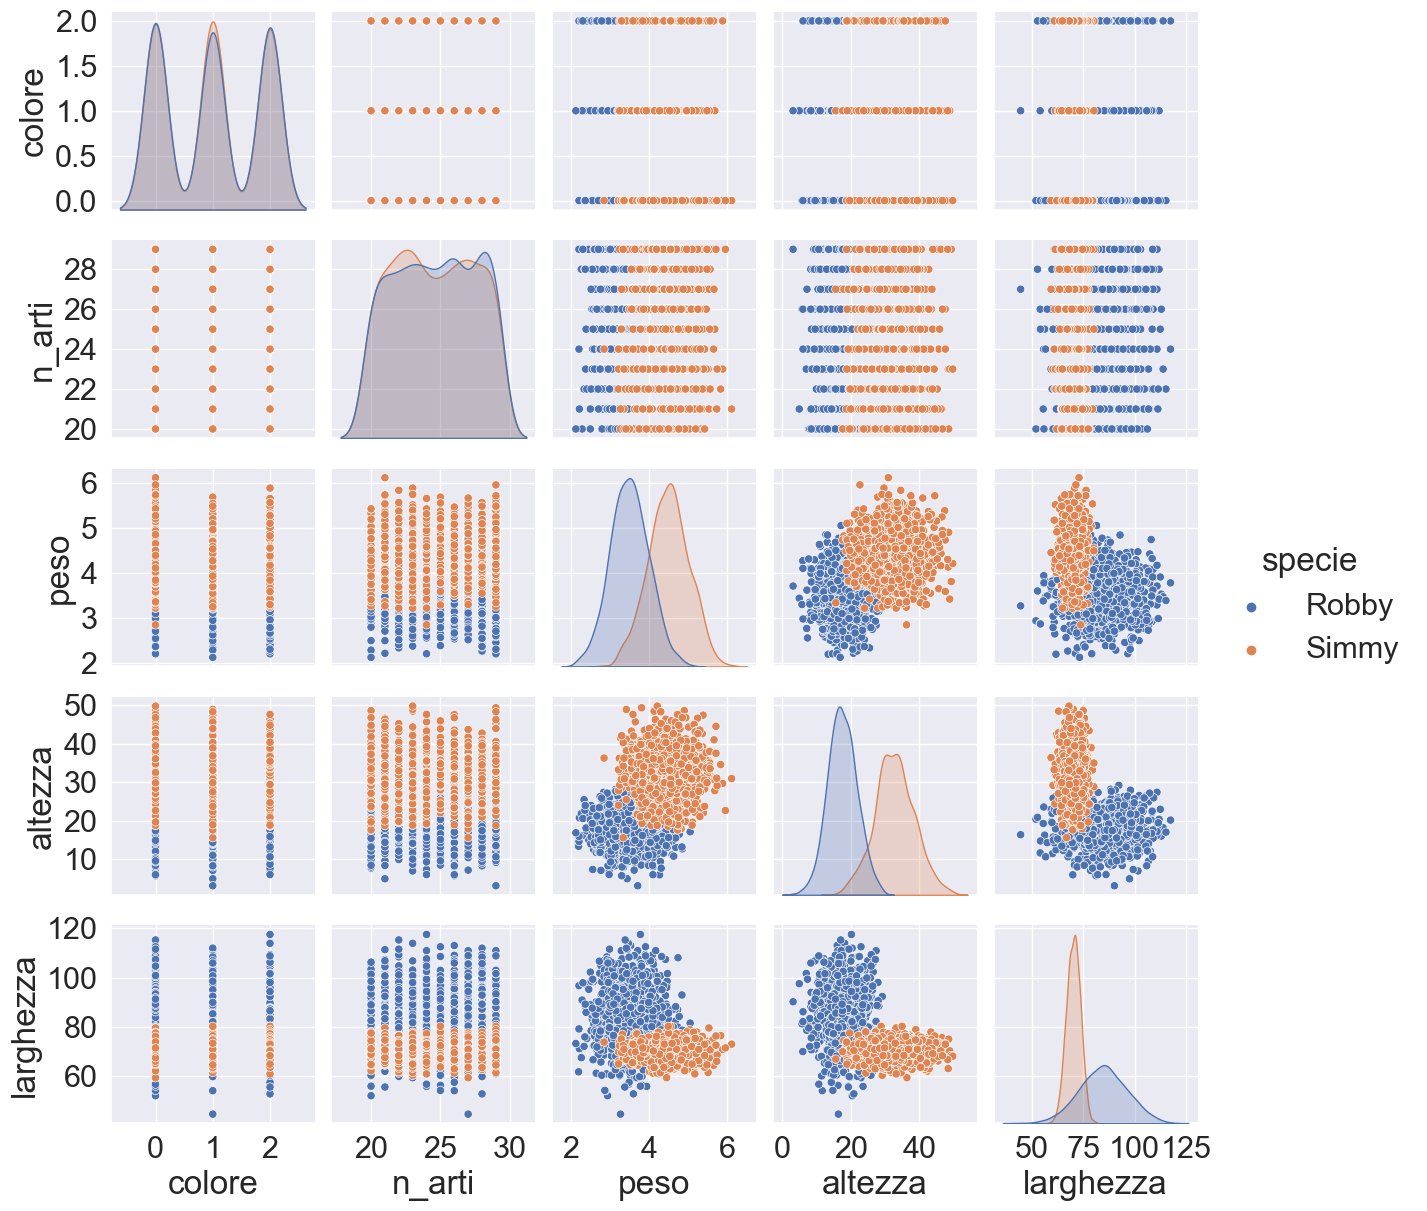

In [21]:
sns.set_theme(font_scale=2)#raddoppiua la dimensione
sns.pairplot(d, hue='specie', dropna=True)#mette in relazione le caratteristiche a due a due, 
#usando come riferimento la colonna specificata in hue
sns.set()#riemposta i valori di default

In [22]:
#colonne con dati mancanti
cols_with_missing=[col for col in d.columns if d[col].isnull().sum()]
print(cols_with_missing)
#caratteristiche per la classificazione
cols_selected=["peso", "altezza", "larghezza"]
#si eliminano le righe con dati mancanti solo nelle colonne selezionate
d=data.dropna(axis='index', subset=cols_selected)
print(d.shape)
#colonne rimanenti con dati mancanti
print([col for col in d.columns if d[col].isnull().sum()])

['colore', 'n_arti', 'altezza', 'larghezza']
(1992, 6)
['colore', 'n_arti']


In [23]:
X=d[cols_selected]
y=d["specie"]
print(X.head())
print(y.head())

   peso  altezza  larghezza
0  3.87    14.77      73.22
1  3.15    28.19      88.44
2  4.35    12.05      76.74
3  3.76     9.90      81.37
4  2.86    19.87      84.65
0    Robby
1    Robby
2    Robby
3    Robby
4    Robby
Name: specie, dtype: object


pragrafo 5:

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=0)
print(X_train.head())
print("Numero campioni in X train: ", X_train.shape[0])
print(y_train.value_counts())#valori per ogni specie
print(y_train.head())

      peso  altezza  larghezza
1853  4.58    29.13      70.59
486   3.93    25.37      95.30
846   3.95    27.27      73.86
376   3.01    21.95      74.95
580   3.17    12.02      76.47
Numero campioni in X train:  1394
Simmy    710
Robby    684
Name: specie, dtype: int64
1853    Simmy
486     Robby
846     Robby
376     Robby
580     Robby
Name: specie, dtype: object


i dati nel train set  devono essere presi a caso per costituire  un campione rappresentativo
i dati del test set non devono appartenere ai dati di sample
funzione riga 3:
trains_size: proporzione set di dati da assenare al training set
test_size è analogo. se uno dei due è assente viene calcolato. se entrambi non ci sono: 75-25%
random_state: seme da cui far partire le funzioni random per la scelta dei casi.

In [26]:
pd.options.display.float_format='{:.3f}'.format #solo 3 numeri decimali
m=X_train.mean()
print(f"media: {m}")
s=X_train.std()
print(f"dev standard: {s}")
X_train_std=((X_train-m)/s)#normalizzo
print(f"train normalizzato: {X_train_std.describe()}")

media: peso         3.995
altezza     25.276
larghezza   77.389
dtype: float64
dev standard: peso         0.708
altezza      9.173
larghezza   10.984
dtype: float64
train normalizzato:           peso  altezza  larghezza
count 1394.000 1394.000   1394.000
mean     0.000   -0.000     -0.000
std      1.000    1.000      1.000
min     -2.536   -2.410     -2.297
25%     -0.742   -0.863     -0.724
50%     -0.007   -0.117     -0.360
75%      0.755    0.846      0.667
max      2.988    2.572      3.444


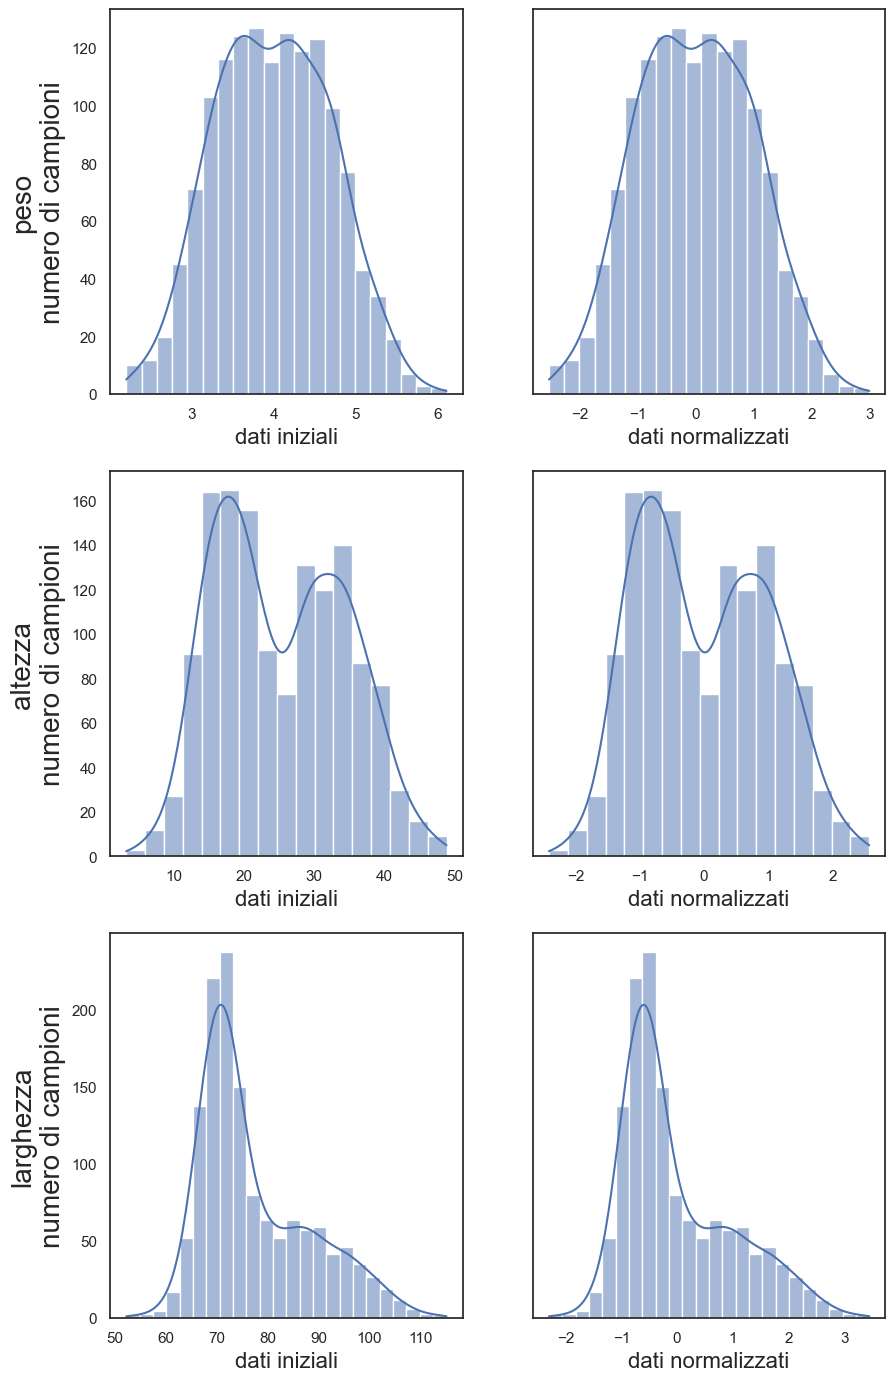

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns. set_style("white") # imposta lo sfondo bianco senza griglia
fig, axes = plt.subplots(3, 2, figsize=(10, 17), sharey='row')#condivide asse y per ogni riga 
for i, ax in enumerate (axes) :
    col = cols_selected[i] # feature corrente
    # etichette dell'asse x e dell'asse y
    ax[0].set_xlabel ('dati iniziali', fontsize=16);
    ax[1]. set_xlabel ('dati normalizzati', fontsize=16)
    ax[0].set_ylabel (col+"\nnumero di campioni", fontsize=20); # asse y condiviso
    # grafici della colonna corrente
    sns.histplot(ax=ax[0], x=X_train[col], kde=True)
    sns.histplot(ax=ax[1], x=X_train_std[col], kde=True)#aggiunge  la curva di stima della distribuzione dei dati
sns.set()


In [35]:
X_test_std=((X_test-m)/s)
print(f"test normalizzato: {X_test_std.describe()}")

test normalizzato:          peso  altezza  larghezza
count 598.000  598.000    598.000
mean   -0.001   -0.048      0.026
std     0.988    0.988      1.035
min    -2.635   -1.968     -2.976
25%    -0.742   -0.876     -0.719
50%    -0.014   -0.175     -0.340
75%     0.738    0.740      0.701
max     2.380    2.668      3.647


Paragrafo 6: Scelta del modello

In [36]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1, max_iter=300)
model.fit(X_train, y_train)#addestramento


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=1)

8 Test:

In [42]:
#Predizioni sui dati di training 
print ("Train")
print (y_train. values[:5])
print (model. predict(X_train_std[:5]))
#Predizioni sui dati di test
print ("Test")
print (y_test. values[:5])
print (model.predict(X_test_std[:5]))
#Predizioni su un caso specifico
caso_std = (([4.8,31.4,70.8] -m) /s)
#normalizziamo i dati
print ("Caso")
print (model.predict ([caso_std]))

Train
['Simmy' 'Robby' 'Robby' 'Robby' 'Robby']
['Simmy' 'Robby' 'Robby' 'Robby' 'Robby']
Test
['Simmy' 'Simmy' 'Robby' 'Robby' 'Simmy']
['Simmy' 'Simmy' 'Robby' 'Robby' 'Simmy']
Caso
['Simmy']


C:\Users\MATTEO MIGLIORE\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [45]:
print("Accuratezza dati di TRAIN: %.3f" % model. score(X_train_std, y_train))
#a questo è un metodo alternativo per avere l'accuratezza
predictions = model. predict(X_test_std)
from sklearn.metrics import accuracy_score
score = accuracy_score (y_test, predictions)
print("Accuratezza dati di TEST: %.3f" % score)


Accuratezza dati di TRAIN: 0.884
Accuratezza dati di TEST: 0.915


C:\Users\MATTEO MIGLIORE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MATTEO MIGLIORE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MATTEO MIGLIORE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MATTEO MIGLIORE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MATTEO MIGLIORE\anacond

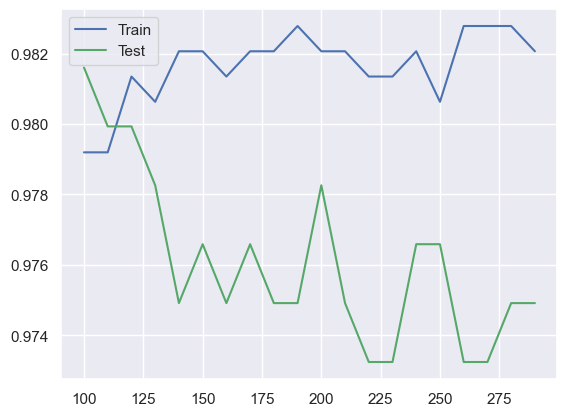

In [54]:
start = 100
stop = 300
passo = 10

vEpochs = np. arange(start, stop, passo)
vAccTrain = []
#lista dell'accuratezza sui dati di train
vAccTest = [] #lista dell'accuratezza sui dati di test
for e in vEpochs:
    mlp = MLPClassifier (hidden_layer_sizes=(100,100), random_state=1, max_iter=e)
    mlp. fit(X_train_std, y_train)
    vAccTrain.append(mlp.score(X_train_std, y_train)) # accuratezza sul training set
    vAccTest. append (mlp.score(X_test_std, y_test))
    # accuratezza sul test set
    #grafico dell'accuratezza
import matplotlib.pyplot as plt

plt.plot (vEpochs, vAccTrain, c='b' ,label = "Train")
plt. plot(vEpochs, vAccTest, c='g', label="Test")
plt. legend ()

In [59]:
model01 = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=115)
model01. fit(X_train_std, y_train)
print("ACcuratezza dsti di TRAIN: %.3f" % model01. score(X_train_std, y_train))
print ("Accuratezza dati di TEST: %.3f" % model01. score(X_test_std, y_test)) 
print (model01. predict([caso_std]))

ACcuratezza dsti di TRAIN: 0.980
Accuratezza dati di TEST: 0.980
['Simmy']


C:\Users\MATTEO MIGLIORE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MATTEO MIGLIORE\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


10:

In [60]:
from joblib import dump, load
#esporto:
dump(model01, "marziani.joblib")

# importo:
modello_importato=load("marziani.joblib")
print(modello_importato.predict([caso_std]))

['Simmy']


C:\Users\MATTEO MIGLIORE\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
